In [9]:
year="2018"
month="8"
day="23"
hour="23"


data = sqlContext.read.json("/data/year="+year+"/month="+month+"/day="+day+"/hour="+hour+"/dump.json")

In [10]:
data = data.filter(data['origin'] == 'byte_counter').orderBy('timestamp')

data.show()

+----------+--------+------------+------------+---------+-------------------+----+-----+---+----+
|byte_count|duration|      origin|packet_count|switch_id|          timestamp|year|month|day|hour|
+----------+--------+------------+------------+---------+-------------------+----+-----+---+----+
|        70|       4|byte_counter|        null|        1|1.535058252052046E9|2018|    8| 23|  23|
|         0|       4|byte_counter|        null|        3|1.535058252073433E9|2018|    8| 23|  23|
|         0|       4|byte_counter|        null|        2|1.535058252075002E9|2018|    8| 23|  23|
|        70|       4|byte_counter|        null|        4|1.535058252076404E9|2018|    8| 23|  23|
|         0|       4|byte_counter|        null|        2|1.535058256164341E9|2018|    8| 23|  23|
|         0|       4|byte_counter|        null|        3|1.535058256164582E9|2018|    8| 23|  23|
|         0|       4|byte_counter|        null|        4|1.535058256170067E9|2018|    8| 23|  23|
|         0|       4

In [11]:
%matplotlib notebook

import matplotlib.pyplot as plt
import sys
import pandas as pd
import matplotlib


In [12]:
column = 'byte_count'

s1 = [row[column] for row in data.filter(data['switch_id'] == 1).select(column).collect()]
s2 = [row[column] for row in data.filter(data['switch_id'] == 2).select(column).collect()]
s3 = [row[column] for row in data.filter(data['switch_id'] == 3).select(column).collect()]
s4 = [row[column] for row in data.filter(data['switch_id'] == 4).select(column).collect()]

s = { 's1': s1, 's2': s2, 's3': s3, 's4': s4 }

<IPython.core.display.Javascript object>


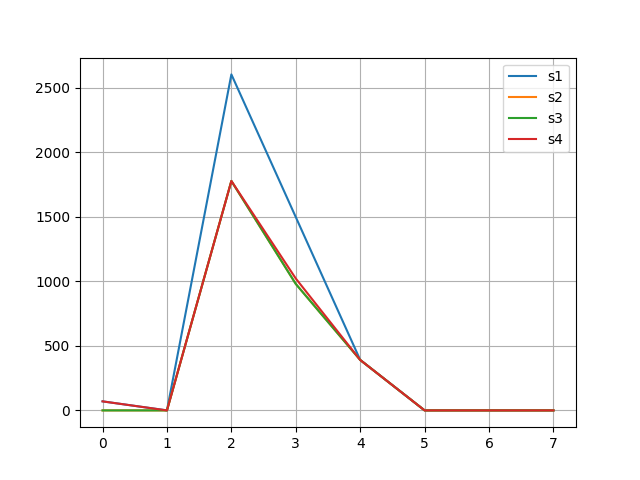

In [13]:
df = pd.DataFrame(data=s, columns=['s1', 's2', 's3', 's4'])

df.plot(grid=True)